In [1]:
from sim_utils import process_sim_results

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd
import session_info
import re
plt.rcParams['figure.dpi'] = 300
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [3]:
session_info.show(html=False)

-----
matplotlib          3.7.4
numpy               1.22.3
pandas              1.3.0
seaborn             0.13.0
session_info        1.0.0
sim_utils           NA
-----
IPython             8.4.0
jupyter_client      6.1.12
jupyter_core        4.7.1
notebook            6.4.4
-----
Python 3.8.5 (default, Sep  4 2020, 02:22:02) [Clang 10.0.0 ]
macOS-10.16-x86_64-i386-64bit
-----
Session information updated at 2024-01-11 10:22


In [4]:
results_sim_vs_af_splici_rad_crlike_sa = process_sim_results(
    "results_other/af/results_sim_vs_af_splici_rad_crlike_sa.txt"
)
results_sim_vs_af_splici_sketch_crlike_sa = process_sim_results(
    "results_other/af/results_sim_vs_af_splici_sketch_crlike_sa.txt"
)
results_sim_vs_af_standard_rad_crlike = process_sim_results(
    "results_other/af/results_sim_vs_af_standard_rad_crlike.txt"
)
results_sim_vs_af_standard_sketch_crlike = process_sim_results(
    "results_other/af/results_sim_vs_af_standard_sketch_crlike.txt"
)
results_sim_vs_cr7 = process_sim_results("results_other/cr7/results_sim_vs_cr.txt")
results_sim_vs_star = process_sim_results("results_other/star/results_sim_vs_star.txt")
results_sim_vs_cc = process_sim_results("results_other/cc/results_sim_vs_cc.txt")

In [5]:
results_sim_vs_af_splici_rad_crlike_sa_exon = process_sim_results(
    "results_other/af/results_sim_vs_af_splici_rad_crlike_sa_exon.txt"
)
results_sim_vs_af_splici_sketch_crlike_sa_exon = process_sim_results(
    "results_other/af/results_sim_vs_af_splici_sketch_crlike_sa_exon.txt"
)
results_sim_vs_af_standard_rad_crlike_exon = process_sim_results(
    "results_other/af/results_sim_vs_af_standard_rad_crlike_exon.txt"
)
results_sim_vs_af_standard_sketch_crlike_exon = process_sim_results(
    "results_other/af/results_sim_vs_af_standard_sketch_crlike_exon.txt"
)
results_sim_vs_cr7_exon = process_sim_results("results_other/cr7/results_sim_vs_cr_exon.txt")
results_sim_vs_star_exon = process_sim_results("results_other/star/results_sim_vs_star_exon.txt")
results_sim_vs_cc_exon = process_sim_results("results_other/cc/results_sim_vs_cc_exon.txt")

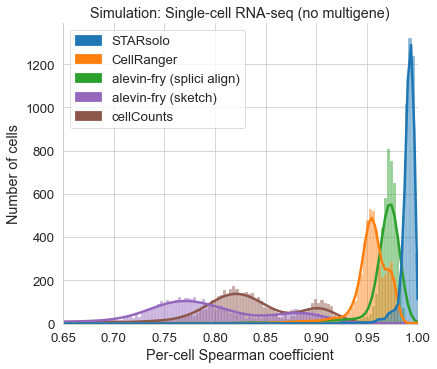

In [6]:
title = "Simulation: Single-cell RNA-seq (no multigene)"
v = results_sim_vs_star["spearman_corrs"]
w = results_sim_vs_cr7["spearman_corrs"]
x = results_sim_vs_af_splici_rad_crlike_sa["spearman_corrs"]
y = results_sim_vs_af_standard_sketch_crlike["spearman_corrs"]
z = results_sim_vs_cc["spearman_corrs"]
data = np.concatenate([v, w, x, y, z])
labels = (
    ['STARsolo'] * len(v) + 
    ['CellRanger'] * len(w) + 
    ['alevin-fry (splici align)'] * len(x) + 
    ['alevin-fry (sketch)'] * len(y) + 
    ['cellCounts'] * len(z)
)

plot_height = 5  # height in inches
plot_aspect_ratio = 1.2 # width = plot_aspect_ratio * height
binwidth = 0.003
xlim_lower = 0.65


df = pd.DataFrame({'Value': data, 'Group': labels})
sns.set_theme()
sns.set_palette(palette)
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
g = sns.displot(data=df, x="Value", hue="Group", fill=True, kde=True, 
                height=plot_height, aspect=plot_aspect_ratio, binwidth=binwidth, legend=False)

legend_labels = []
[legend_labels.append(x) for x in labels if x not in legend_labels]
unique_labels = pd.unique(df['Group'])
custom_patches = [mpatches.Patch(color=palette[i], label=label) for i, label in enumerate(unique_labels)]
plt.legend(handles=custom_patches, loc='upper left')
plt.xlim(xlim_lower, 1)
plt.title(title)
plt.xlabel('Per-cell Spearman coefficient')
plt.ylabel('Number of cells')
plt.show()

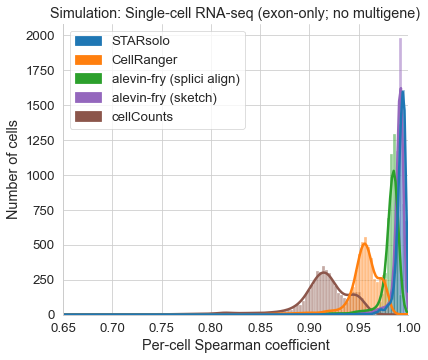

In [7]:
title = "Simulation: Single-cell RNA-seq (exon-only; no multigene)"
v = results_sim_vs_star_exon["spearman_corrs"]
w = results_sim_vs_cr7_exon["spearman_corrs"]
x = results_sim_vs_af_splici_rad_crlike_sa_exon["spearman_corrs"]
y = results_sim_vs_af_standard_sketch_crlike_exon["spearman_corrs"]
z = results_sim_vs_cc_exon["spearman_corrs"]
data = np.concatenate([v, w, x, y, z])
labels = (
    ['STARsolo'] * len(v) + 
    ['CellRanger'] * len(w) + 
    ['alevin-fry (splici align)'] * len(x) + 
    ['alevin-fry (sketch)'] * len(y) + 
    ['cellCounts'] * len(z)
)

plot_height = 5  # height in inches
plot_aspect_ratio = 1.2 # width = plot_aspect_ratio * height
binwidth = 0.003
xlim_lower = 0.65


df = pd.DataFrame({'Value': data, 'Group': labels})
sns.set_theme()
sns.set_palette(palette)
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
g = sns.displot(data=df, x="Value", hue="Group", fill=True, kde=True, 
                height=plot_height, aspect=plot_aspect_ratio, binwidth=binwidth, legend=False)

legend_labels = []
[legend_labels.append(x) for x in labels if x not in legend_labels]
unique_labels = pd.unique(df['Group'])
custom_patches = [mpatches.Patch(color=palette[i], label=label) for i, label in enumerate(unique_labels)]
plt.legend(handles=custom_patches, loc='upper left')
plt.xlim(xlim_lower, 1)
plt.title(title)
plt.xlabel('Per-cell Spearman coefficient')
plt.ylabel('Number of cells')
plt.show()

In [8]:
results_df_template = pd.DataFrame({
    "Program": [],
    "Run mode": [],
    "Median ρ*": [],
    "Median r": [],
    "RMSE": [],
    "FPR": [],
    "FNR": [],
})

def get_results(data_dict):

    results = data_dict.copy()
    results.pop('spearman_corrs', None)
    results.pop('spearman_corrs_zeroes_included', None)
    results.pop('errors', None)
    results.pop('false_positives', None)
    results.pop('false_negatives', None)
    results.pop('num_genes', None)
    results.pop('total_count', None)
    results.pop('num_barcodes_in_intersection', None)
    results.pop('num_barcodes_in_simulation', None)
    results.pop('num_barcodes_in_program', None)
    results.pop('num_genes_in_intersection', None)
    results.pop('num_genes_in_simulation', None)
    results.pop('num_genes_in_program', None)
    rmse = results['rmse']
    fnr = results['fnr']
    fpr = results['fpr']
    med_rho = results['median_spearman_corrs']
    med_rho_0 = results['median_pearson_corrs_zeroes_included']
    return [med_rho, med_rho_0, rmse, fpr, fnr]

In [9]:
# Single-cell (no multigene)

results_df = results_df_template.copy()
results_df.loc[len(results_df)] = (
    ["STARsolo", ""] +
    get_results(results_sim_vs_star)
)
results_df.loc[len(results_df)] = (
    ["CellRanger", "--include-introns=false"] +
    get_results(results_sim_vs_cr7)
)
results_df.loc[len(results_df)] = (
    ["alevin-fry", "splici align"] +
    get_results(results_sim_vs_af_splici_rad_crlike_sa)
)
results_df.loc[len(results_df)] = (
    ["alevin-fry", "splici sketch"] +
    get_results(results_sim_vs_af_splici_sketch_crlike_sa)
)
results_df.loc[len(results_df)] = (
    ["alevin-fry", "align"] + 
    get_results(results_sim_vs_af_standard_rad_crlike)
)
results_df.loc[len(results_df)] = (
    ["alevin-fry", "sketch"] + 
    get_results(results_sim_vs_af_standard_sketch_crlike)
)
results_df.loc[len(results_df)] = (
    ["cellCounts", ""] + 
    get_results(results_sim_vs_cc)
)
results_df

,Program,Run mode,Median ρ*,Median r,RMSE,FPR,FNR
0,STARsolo,,0.991877,0.999940,0.042743,0.000140,0.000270
1,CellRanger,--include-introns=false,0.955377,0.999499,0.232933,0.000081,0.000343
2,alevin-fry,splici align,0.971626,0.998672,0.288308,0.000314,0.000702
3,alevin-fry,splici sketch,0.960025,0.997419,0.414070,0.000764,0.000739
4,alevin-fry,align,0.879684,0.998145,0.312199,0.005676,0.000446
5,alevin-fry,sketch,0.778933,0.995372,0.527728,0.016063,0.000357
6,cellCounts,,0.825302,0.993000,0.532384,0.005890,0.001299


In [10]:
# Single-cell (no multigene; exon-only)

results_df = results_df_template.copy()
results_df.loc[len(results_df)] = (
    ["STARsolo", ""] +
    get_results(results_sim_vs_star_exon)
)
results_df.loc[len(results_df)] = (
    ["CellRanger", "--include-introns=false"] +
    get_results(results_sim_vs_cr7_exon)
)
results_df.loc[len(results_df)] = (
    ["alevin-fry", "splici align"] +
    get_results(results_sim_vs_af_splici_rad_crlike_sa_exon)
)
results_df.loc[len(results_df)] = (
    ["alevin-fry", "splici sketch"] +
    get_results(results_sim_vs_af_splici_sketch_crlike_sa_exon)
)
results_df.loc[len(results_df)] = (
    ["alevin-fry", "align"] + 
    get_results(results_sim_vs_af_standard_rad_crlike_exon)
)
results_df.loc[len(results_df)] = (
    ["alevin-fry", "sketch"] + 
    get_results(results_sim_vs_af_standard_sketch_crlike_exon)
)
results_df.loc[len(results_df)] = (
    ["cellCounts", ""] + 
    get_results(results_sim_vs_cc_exon)
)
results_df

,Program,Run mode,Median ρ*,Median r,RMSE,FPR,FNR
0,STARsolo,,0.993564,0.999968,0.030486,0.000053,0.000270
1,CellRanger,--include-introns=false,0.956866,0.999547,0.232195,0.000030,0.000343
2,alevin-fry,splici align,0.984427,0.999902,0.069541,0.000030,0.000709
3,alevin-fry,splici sketch,0.982900,0.999889,0.062949,0.000031,0.000743
4,alevin-fry,align,0.990880,0.999931,0.060543,0.000030,0.000466
5,alevin-fry,sketch,0.991528,0.999948,0.043601,0.000031,0.000393
6,cellCounts,,0.915796,0.994174,0.521436,0.000239,0.001337
